In [1]:
import sys
sys.path.append("..")

import numpy as np
import sklearn.feature_selection
import matplotlib.pyplot as plt
from ndmg_stats.graphStats import GraphStats
from random_graphs.graph import random_graph

In [2]:
X = []
y = np.zeros(50)

# 70% chance of connection = 1
for i in range(25):
    g = random_graph(30, 0.7)
    gs = GraphStats(g)
    stats = np.array(gs.return_stats())
    X.append(stats)
    y[i] = 1
    
# 30% chance of connection = 0
for j in range(25,50):
    g = random_graph(30, 0.3)
    gs = GraphStats(g)
    stats = np.array(gs.return_stats())
    X.append(stats)
    y[i] = 0
    
X = np.matrix(X)

In [3]:
print(X)

[[ 10.63333333  26.          20.7718275  ...,   2.           0.
    1.31954023]
 [ 10.43333333  25.          20.41335805 ...,   2.           0.
    1.33333333]
 [ 11.06666667  28.          21.56550703 ...,   2.           0.
    1.29195402]
 ..., 
 [  4.63333333  15.           9.73252091 ...,   3.           0.
    1.72183908]
 [  4.23333333  15.           8.65380471 ...,   3.           0.           1.8091954 ]
 [  4.5         13.           9.29426768 ...,   3.           0.
    1.74022989]]


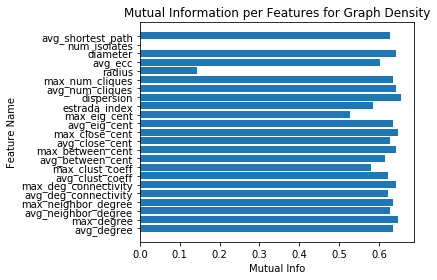

In [6]:
mi = sklearn.feature_selection.mutual_info_classif(X, y)

labels =["avg_degree", 
        "max_degree",
        "avg_neighbor_degree",
        "max_neighbor_degree",
        "avg_deg_connectivity",
        "max_deg_connectivity",
        "avg_clust_coeff",
        "max_clust_coeff",
        "avg_between_cent",
        "max_between_cent",
        "avg_close_cent",
        "max_close_cent",
        "avg_eig_cent",
        "max_eig_cent",
        "estrada_index",
        "dispersion",
        "avg_num_cliques",
        "max_num_cliques",
        "radius",
        "avg_ecc",
        "diameter",
        "num_isolates",
        "avg_shortest_path"]

plt.figure()
plt.barh(range(mi.shape[0]), mi, align="center")
plt.yticks(range(mi.shape[0]), labels)
plt.title("Mutual Information per Features for Graph Density")
plt.xlabel("Mutual Info")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.savefig("mutual_info_rand_graph.png", dpi=400)
plt.show()
